# STAT40800 Midterm Assignment
## Exploratory data analysis of the Irish weather

For this assignment you will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

### Instructions
* Solutions must be submitted on Brightspace under *Assessments* $\rightarrow$ *Midterm Assignment*.
* Your submission must include your completed Jupyter notebook in .ipynb **and** PDF format. To create a PDF of your notebook select *File* $\rightarrow$ *Download as* $\rightarrow$ *PDF via LaTeX (.pdf)*.
* All of the results that you wish to include should be viewable without running the Python code. Note that the code may still be run by the grader to check that it functions properly and as intended.
* Marks will be awarded for complete and correct answers to all 9 questions. An additional 10 marks will be reserved for organisation, presentation and conciseness.
* For full marks, you must justify your answers, clearly explain all steps and computations, label your figures, and write concise code.
* The assignment must be completed individually. 


This assignment is **due at 11:59pm on October 31st, 2022**.

In [1]:
# Load in necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

**1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)**


In [2]:
#First of all, I load the Weather dataset
path = 'python-assignment/'
df = pd.read_csv(path+'weather.csv', skiprows=10, header =1)

In [3]:
#Then, I show the information of the dataset
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      1095 non-null   int64  
 1   month    1095 non-null   object 
 2   year     1095 non-null   int64  
 3   station  1095 non-null   object 
 4   maxtp    1093 non-null   float64
 5   mintp    1093 non-null   float64
 6   rain     1091 non-null   float64
 7   wdsp     1094 non-null   float64
 8   hg       1092 non-null   float64
 9   sun      1093 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 85.7+ KB
None
(1095, 10)


In [4]:
#Here, I also show the first few rows of the dataset
df.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


In [5]:
#To answer the question about years of recording, I use below code
print(df['year'].unique())

[2021]


The type of the data is a dataframe and it contains 1095 rows and 10 columns. The data only contains one year recording, which is Year 2021. 

Temporal resolution is the spacing between datapoints, where in these observations, the weather is measured by day.

The weather measurements being reported are Maximum Air Temperature (maxtp), Minimum Air Temperature (mintp), Precipitation Amount (rain), Mean Wind Speed (wdsp), Highest Gust (hg), and Sunshine Duration (sun).

**2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)**

    **Note:** You do not need to implement any of your suggested strategies.

In [6]:
#Here, I count the missing values in each column of the dataset:
print(df.isnull().sum())

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64


Missing values can happen due to multiple reasons like unrecorded observations or data corruption. It may be classed into, depending on the pattern or data that is absent in the dataset or data:

> - Missing Completely at Random (MCAR): When the probability of missing data is unrelated to the precise value to be obtained or the collection of observed answers.

> - Missing at Random (MAR): When the probability of missing responses is decided by the collection of observed responses rather than the exact missing values expected to be reached.

> - Missing not at Random (MNAR): Other than the above-mentioned categories, MNAR is the missing data. The MNAR data cases are a pain to deal with. Modelling the missing data is the only way to get a fair approximation of the parameters in this situation.

Below are strategies for filling the missing values:


> A. Imputation by Mean: Using this approach, we may compute the mean of a column’s non-missing values, and then replace the missing values in each column separately and independently of the others.
> - Advantage: Simple and faster way to analyze small amounts of data
> - Disadvantage: Lack of feature correlations, only works with one column at a time. A skewed mean value will likely replace an outlier treatment. And this techinique only works with numerical datasets and fails when independent variables are correlated. Using the mean also destroys the relationships between variables

> B. Imputation by Median

> - Advantage: It addresses the imputation by Mean method’s outlier issue
> - Disadvantage: Works only with numerical datasets and failed in covariance between the independent variables

> C. Imputation by Most Frequent Value (Mode): This method may be applied to categorical variables with a finite set of values. To impute, we can use the most common value
> - Advantage: Works with all formats of data
> - Disadvantage: Covariance value cannot be predicted between independent features

> D. Imputation for Categorical Values: When categorical columns have missing values, the most prevalent category may be utilized to fill in the gaps. If there are many missing values, a new category can be created to replace them
> - Advantage: Good for small datasets. Compliments the loss by inserting the new category
> - Disadvantage: Cannot be used for other than categorical data, additional encoded features may result in a drop inaccuracy

> E. Last Observation Carried Forward (LOCF): LOCF is a method of imputing missing data in longitudinal studies. This approach carries forward the last observation to the last time point for those who have dropped out of follow-up investigations
> - Advantage: Maximizes the number of observations with each missing observation being assigned a singly imputed score
> - Disadvantage: This method makes the assumption that the observation of the individual has not changed at all since the last measured observation, which is often unrealistic

> F. Linear Interpolation: Linear Interpolation means estimating a missing value by connecting dots in the straight line in increasing order. It estimates the unknown value in the same increasing order as the previous values. 
> - Advantage: Quick and easy to use
> - Disadvantage: Not very accurate for nonlinear functions

> G. Imputation by K-NN: We approximate the value based on the points that are closest in n-dimensional space. Hyperparameters of the KNN algorithm need to be defined, including number of neighbors and weights. Selecting the number of neighbors is going to be a trade-off between noise and therefore generalizability and computational complexity. Small K = more noise/faster, Large K = robust our results will be in the face of noise/computationally complex. We need to normalize our data prior to KNN imputation. Like logistic regression, KNN suffers from large values playing a disproportionate role if not normalized.
> - Advantage: KNN modeling does not include training period as the data itself is a model which will be the reference for future prediction and because of this it is very time efficient in term of improvising for a random modeling on the available data. KNN is very easy to implement as the only thing to be calculated is the distance between different points on the basis of data of different features and this distance can easily be calculated using distance formula such as- Euclidian or Manhattan. As there is no training period thus new data can be added at any time since it wont affect the model.
> - Disadvantage: Does not work well with large dataset as calculating distances between each data instance would be very costly, does not work well with high dimensionality as this will complicate the distance calculating process to calculate distance for each dimension, sensitive to noisy and missing data, and data in all the dimension should be scaled (normalized and standardized) properly 

> H. Imputation by Multivariate Imputation by Chained Equation (MICE): MICE is a method for replacing missing data values in data collection via multiple imputations. We can start by making duplicate copies of the data set with missing values in one or more of the variables.
> - Advantage: keeps relative distribution similar before and after imputation, may be applied in ordinal categorical data
> - Disadvantage: Use for ordinal categorical data will require .round() method, as the outcome will be a floating point

**3. Write code to answer the following questions: (15 marks)**

    A. How many different weather stations are included in the data set?
    
    B. At what station and on what date was the lowest minimum air temperature recorded?
    
    C. At what station and on what date was the largest amount of rain recorded?

> A. There are 3 different weather stations included in the dataset:
Dublin Airport, Shannon Airport, and Cork Airport. Each of the airport has the same frequency recorded, which are 365 days

In [7]:
#Code for question 3A:
print(df['station'].unique())

['Dublin Airport' 'Shannon Airport' 'Cork Airport']


In [8]:
#I would like to know the frequency of the observations in each airport using below code:
print(df['station'].value_counts())

Dublin Airport     365
Shannon Airport    365
Cork Airport       365
Name: station, dtype: int64


> B. The lowest minimum air temperature recorded is on 9 January 2021 at Dublin Airport

In [9]:
#Code for question 3B:
print(df[df.mintp == df.mintp.min()])

   day month  year         station  maxtp  mintp  rain  wdsp    hg  sun
8    9   jan  2021  Dublin Airport    2.4   -5.9   0.0   6.5  19.0  6.8


> C. The largest amount of rain recorded in on 27 October 2021 at Cork Airport

In [10]:
print(df[df.rain == df.rain.max()])

      day month  year       station  maxtp  mintp  rain  wdsp    hg  sun
1029   27   oct  2021  Cork Airport   14.7   12.4  50.1  16.4  36.0  0.0


**4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)**

In [11]:
#First, I create new data frame with weather measurement column only
df_weather_measurement = pd.DataFrame().assign(maxtp=df['maxtp'], 
                                               mintp=df['mintp'], 
                                               rain=df['rain'],
                                               wdsp=df['wdsp'],
                                               hg=df['hg'],
                                               sun=df['sun'])

#Here, I show the numerical summary for each of the weather measurements
print(df_weather_measurement.describe())

             maxtp        mintp         rain         wdsp           hg  \
count  1093.000000  1093.000000  1091.000000  1094.000000  1092.000000   
mean     13.732662     6.950046     2.596242     8.587020    22.863553   
std       5.107554     4.687423     4.864790     3.705469     8.396710   
min       0.600000    -5.900000     0.000000     1.900000     7.000000   
25%      10.200000     3.400000     0.000000     6.000000    17.000000   
50%      13.400000     7.100000     0.300000     7.900000    21.000000   
75%      17.600000    10.700000     3.050000    10.600000    28.000000   
max      29.600000    18.700000    50.100000    26.300000    64.000000   

               sun  
count  1093.000000  
mean      4.036780  
std       3.958998  
min       0.000000  
25%       0.300000  
50%       2.900000  
75%       6.600000  
max      15.200000  


In [12]:
#I also show the mode of the weather measurements
print(df_weather_measurement.mode())

   maxtp  mintp  rain  wdsp    hg  sun
0   11.1    6.6   0.0   6.5  19.0  0.0


Then, I make interpretation based on the numerical summary I obtain:

**Numerical summary for Maximum Air Temperature (maxtp)**

We have 1093 observations and 2 missing values for Maximum Air Temperature. In these results, the mean of maxtp is 13.73°C and the median is 13.40°C. The data appear to be skewed to the right, where the mean is greater than the median.

The standard deviation is 5.11°C and the spread of the middle distribution is between 10.20°C and 17.60°C (IQR range of 7.40°C).

Furthermore, the Maximum Air Temperature is ranging from 0.60°C to 29.60°C (range value of 29.00°C).

**Numerical summary for Minimum Air Temperature (mintp)**

We have 1093 observations and 2 missing values for Minimum Air Temperature. In these results, the mean of mintp is 6.95°C, and the median is 7.10°C. The data appear to be skewed to the left, where the mean is lesser than the median.

The standard deviation is 4.69°C and the spread of the middle distribution is between 3.40°C and 10.70°C (IQR range of 7.30°C).

Furthermore, the Minimum Air Temperature is ranging from -5.90°C to 18.70°C (range value of 24.60°C).

**Numerical summary for Precipitation Amount (rain)**

We have 1091 observations and 4 missing values for Precipitation Amount. In these results, the mean of rain is 2.60 mm, and the median is 0.30 mm. The data appear to be skewed to the right, where the mean is greater than the median.

The standard deviation is 4.86 and the spread of the middle distribution is between 0 mm and 3.05 mm (IQR range of 3.05 mm).

Furthermore, the Precipitation is ranging from 0 mm to 50.10 mm (range value of 50.10 mm).

**Numerical summary for Mean Wind Speed (wdsp)**

We have 1094 observations and 1 missing value for Mean Wind Speed. In these results, the mean of wdsp is 8.59 knot and the median is 7.90 knot. The data appear to be skewed to the right, where the mean is greater than the median.

The standard deviation is 3.71 knot and the spread of the middle distribution is between 6.00 knot and 10.60 knot (IQR range of 4.6 knot).

Furthermore, the Mean Wind Speed is ranging from 1.90 knot to 26.30 knot (range value of 24.40 knot).

**Numerical summary for Highest Gust (hg)**

We have 1092 observations and 3 missing values for Highest Gust. In these results, the mean of hg is 22.86 knot and the median is 21.00 knot. The data appear to be skewed to the right, where the mean is greater than the median.

The standard deviation is 8.40 knot and the spread of the middle distribution is between 17.00 knot and 28.00 knot (IQR range of 11.00 knot).

Furthermore, the Highest Gust is ranging from 7.00 knot to 64.00 knot (range value of 57.00 knot).

**Numerical summary for Sunshine Duration (sun)**

We have 1093 observations and 2 missing values for Sunshine Duration. In these results, the mean of sunshine duration is 4.04 hours and the median is 2.90 hours. The data appear to be skewed to the right, where the mean is greater than the median.

The standard deviation is 3.96 hours and the spread of the middle distribution is between 0.30 hours and 6.60 hours (IQR range of 6.3 hours).

Furthermore, the Sunshine Duration is ranging from 0 hours to 15.20 hours (range value of 15.20 hours).

**5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)**

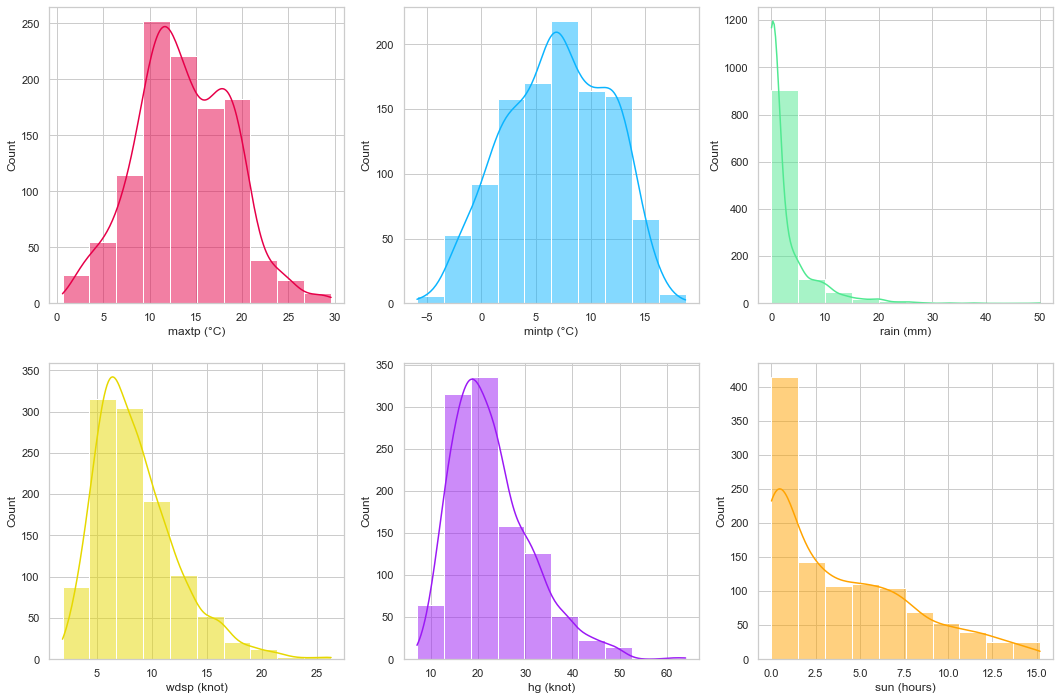

In [13]:
#I create histogram and density weather measurements summary with below code:
sns.set(style="whitegrid")

fig,axs = plt.subplots(2,3, figsize = (18,12))

sns.histplot(data=df_weather_measurement, 
             x="maxtp", 
             kde=True, 
             color="#e60049", 
             ax=axs[0, 0], 
             bins =10).set(xlabel ="maxtp (°C)")
sns.histplot(data=df_weather_measurement, 
             x="mintp", 
             kde=True, 
             color="#0bb4ff", 
             ax=axs[0, 1], 
             bins =10).set(xlabel ="mintp (°C)")
sns.histplot(data=df_weather_measurement, 
             x="rain", 
             kde=True, 
             color="#50e991", 
             ax=axs[0, 2], 
             bins =10).set(xlabel ="rain (mm)")
sns.histplot(data=df_weather_measurement, 
             x="wdsp", 
             kde=True, 
             color="#e6d800", 
             ax=axs[1, 0], 
             bins =10).set(xlabel ="wdsp (knot)")
sns.histplot(data=df_weather_measurement, 
             x="hg", 
             kde=True, 
             color="#9b19f5", 
             ax=axs[1, 1], 
             bins =10).set(xlabel ="hg (knot)")
sns.histplot(data=df_weather_measurement, 
             x="sun", 
             kde=True, 
             color="#ffa300", 
             ax=axs[1, 2], 
             bins =10).set(xlabel ="sun (hours)")

plt.show()

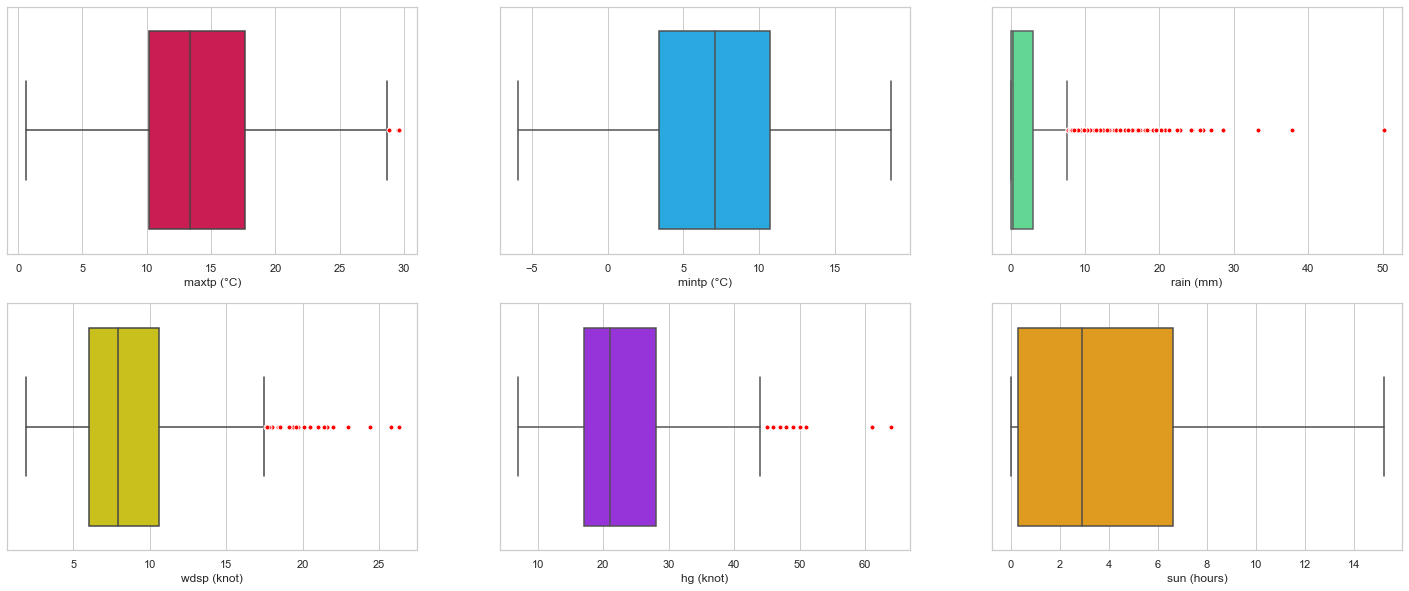

In [14]:
#I create boxplot weather measurements summary with below code:
sns.set(style="whitegrid")  

#Change the outlier marker to color red
red_circle = dict(markerfacecolor = 'red', marker='o',markeredgecolor='white')

fig,axs = plt.subplots(2,3, figsize = (25,10))
sns.boxplot(data=df_weather_measurement, 
            x="maxtp",
            color="#e60049", 
            flierprops = red_circle, 
            ax=axs[0, 0]).set(xlabel ="maxtp (°C)")
sns.boxplot(data=df_weather_measurement, 
            x="mintp",
            color="#0bb4ff", 
            flierprops = red_circle, 
            ax=axs[0, 1]).set(xlabel ="mintp (°C)")
sns.boxplot(data=df_weather_measurement, 
            x="rain", 
            color="#50e991", 
            flierprops = red_circle, 
            ax=axs[0, 2]).set(xlabel ="rain (mm)")
sns.boxplot(data=df_weather_measurement, 
            x="wdsp", 
            color="#e6d800", 
            flierprops = red_circle, 
            ax=axs[1, 0]).set(xlabel ="wdsp (knot)")
sns.boxplot(data=df_weather_measurement, 
            x="hg", 
            color="#9b19f5", 
            flierprops = red_circle, 
            ax=axs[1, 1]).set(xlabel ="hg (knot)")
sns.boxplot(data=df_weather_measurement, 
            x="sun", 
            color="#ffa300", 
            flierprops = red_circle, 
            ax=axs[1, 2]).set(xlabel ="sun (hours)")

plt.show()

Here, I do interpretation based on the graphical summary for each of the weather measurement and connect it with the numerical summary at question 4. To sum up:

- Maximum Air Temperature (maxtp) has a right skewed distribution, which is also shown in the numerical summary in part 4, where the mean of maxtp (13.73°C) is greater than its median (13.40°C). The distribution appears to be bimodal with the main peak at around 11.00°C and a lower peak around 18.00°C. There are several outliers located above the maximum value in this distribution. The spread of the middle distribution is between 10.20°C and 17.60°C (IQR range of 7.40°C) and it is ranging from 0.60°C to 29.60°C (range value of 29.00°C).


- Minimum Air Temperature (mintp) has a left skewed distribution, which is also shown in the numerical summary in part 4, where the mean of mintp (6.95°C) is lesser than its median (7.10°C). The peak of this distribution is around 6.60°C. There is no outlier in this distribution. The spread of the middle distribution is between 3.40°C and 10.70°C (IQR range of 7.30°C) and it is ranging from -5.90°C to 18.70°C (range value of 24.60°C).


- Precipitation Amount (rain) has a right skewed distribution, which is also shown in the numerical summary in part 4, where the mean of rain (2.60 mm) is greater than its median (0.30 mm). The peak of this distribution is around 0 mm. There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 0 mm and 3.05 mm (IQR range of 3.05 mm) and it is ranging from 0 mm to 50.10 mm (range value of 50.10 mm). 


- Mean Wind Speed (wdsp) has a right skewed distribution, which is also shown in the numerical summary in part 4, where the mean of wdsp (8.59 knot) is greater than its median (7.90 knot). The peak of this distribution is around  6.50 knot. There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 6.00 knot and 10.60 knot (IQR range of 4.6 knot) and it is ranging from 1.90 knot to 26.30 knot (range value of 24.40 knot).


- Highest Gust (hg) has a right skewed distribution, which is also shown in the numerical summary in part 4, where the mean of hg (22.86 knot) is greater than its median (21.00 knot). The peak of this distribution is around 19.00 knot. There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 17.00 knot and 28.00 knot (IQR range of 11.00 knot) and it is ranging from 7.00 knot to 64.00 knot (range value of 57.00 knot).


- Sun Duration (sun) has a right skewed distribution, which is also shown in the numerical summary in part 4, where the mean of sun (4.04 hours) is greater than its median (2.90 hours). The peak of this distribution is around 0. There is no outlier in this distribution. The spread of the middle distribution is between 0.30 hours and 6.60 hours (IQR range of 6.3 hours) and it is ranging from 0 hours to 15.20 hours (range value of 15.20 hours).

**6. Produce a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. Interpret your plot. (8 marks)**

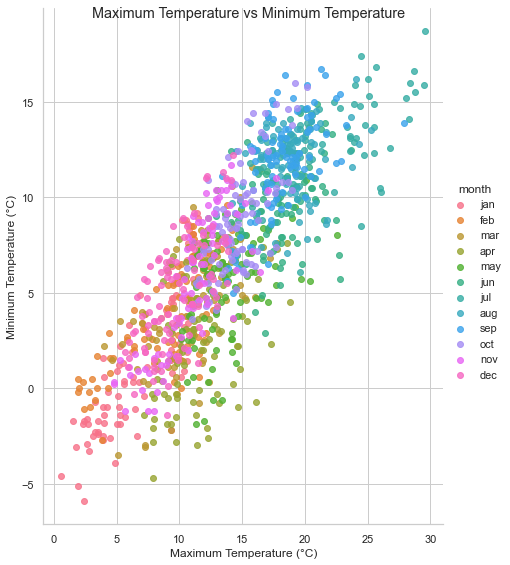

In [15]:
#Creating Scatterplot to show the relationship between Maximum Air Temperature and Minimum Air Temperature 
#based on months

sns.lmplot(x='maxtp', 
           y='mintp', 
           height=8,
           aspect=.8,
           data=df, 
           fit_reg=False, 
           hue='month', 
           legend=True).fig.suptitle("Maximum Temperature vs Minimum Temperature")

plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Minimum Temperature (°C)")
 
plt.show()

In [16]:
#Here, I would like to check the correlation between 
#Maximum Air Temperature and Minimum Air Temperature for overall months, 
#and I obtain:
df['maxtp'].corr(df['mintp'])

0.8298614028880574

> We can see from above scatterplot that there is a positive, strong linear relationship between Maximum Air Temperature and Minimum Air Temperature for overall months with correlation of 0.83.

**7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the first few rows of your DataFrame to show that the column has been added correctly. (5 marks)**

In [17]:
#Here, I compute the daily temperature range using below Code
dailytprange = df['maxtp'] - df['mintp']
#Then, I add this additional variable to the DataFrame
df['dailytprange'] = dailytprange
#And, print out the first few rows of the DataFrame
print(df.head())

   day month  year         station  maxtp  mintp  rain  wdsp    hg  sun  \
0    1   jan  2021  Dublin Airport    5.0   -1.9   0.0   8.8  19.0  6.6   
1    2   jan  2021  Dublin Airport    3.5   -2.4   0.1  10.1  19.0  2.4   
2    3   jan  2021  Dublin Airport    3.9   -2.5   4.1   9.2  30.0  0.6   
3    4   jan  2021  Dublin Airport    5.3    2.2   0.5  11.5  27.0  0.6   
4    5   jan  2021  Dublin Airport    5.2    1.2   1.0   9.5  25.0  1.0   

   dailytprange  
0           6.9  
1           5.9  
2           6.4  
3           3.1  
4           4.0  


**8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. Interpret your plot. (8 marks)**

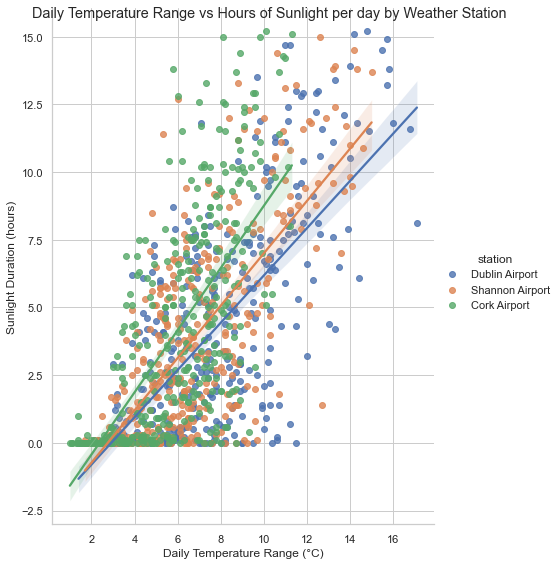

In [18]:
#Here, I create a plot to show the relationship between 
#Daily Temperature Range vs The Hours of Sunlight per day
#based on weather stations
sns.lmplot(x='dailytprange', 
           y='sun', 
           height=8,
           aspect=.8,
           data=df, 
           hue='station', 
           legend=True).fig.suptitle("Daily Temperature Range vs Hours of Sunlight per day by Weather Station")


plt.xlabel("Daily Temperature Range (°C)")
plt.ylabel("Sunlight Duration (hours)")
 
plt.show()

In [19]:
#In this part, I would like to see the correlation between 
#the two variables based on each weather station
#Thus, I create dataset for the three weather stations below:
df_dublin =df.query("station == 'Dublin Airport'")
df_shannon=df.query("station == 'Shannon Airport'")
df_cork=df.query("station == 'Cork Airport'")

In [20]:
#Now,I check the correlation between the two variables for overall weather stations:
corr_allstations = df['dailytprange'].corr(df['sun'])
print("The correlation between Daily Temperature Range and Sunshine Duration for Overall Stations is",
      round(corr_allstations,2))
#Then, I show the correlation between the two variables for each station:
corr_dailytpsun_dublin = df_dublin['dailytprange'].corr(df_dublin['sun'])
print("The correlation between Daily Temperature Range and Sunshine Duration for Dublin Airport is",
      round(corr_dailytpsun_dublin,2))
corr_dailytpsun_shannon = df_shannon['dailytprange'].corr(df_shannon['sun'])
print("The correlation between Daily Temperature Range and Sunshine Duration for Shannon Airport is", 
      round(corr_dailytpsun_shannon,2))
corr_dailytpsun_cork = df_cork['dailytprange'].corr(df_cork['sun'])
print("The correlation between Daily Temperature Range and Sun Duration for Cork Airport is", 
      round(corr_dailytpsun_cork,2))

The correlation between Daily Temperature Range and Sunshine Duration for Overall Stations is 0.67
The correlation between Daily Temperature Range and Sunshine Duration for Dublin Airport is 0.7
The correlation between Daily Temperature Range and Sunshine Duration for Shannon Airport is 0.71
The correlation between Daily Temperature Range and Sun Duration for Cork Airport is 0.66


> We can see from the relationship plot above that there is a positive relationship between Daily Temperature Range and Sun Duration for Dublin Airport, Shannon Airport, and Cork Airport with correlation of 0.7 (strong relationship), 0.71 (strong relationship), and 0.66 (moderate relationship) respectively.

**9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)**

For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

First of all, for this question, I show numerical and graphical summaries for each of the weather stations with the weather measurements.

In [21]:
#Dublin Airport Weather Measurement
#I create weather measurement data frame for Dublin Airport and show the numerical summary
df_dublin_weathermeasurement = pd.DataFrame().assign(maxtp=df_dublin['maxtp'], 
                                                     mintp=df_dublin['mintp'], 
                                                     rain=df_dublin['rain'],
                                                     wdsp=df_dublin['wdsp'],
                                                     hg=df_dublin['hg'],
                                                     sun=df_dublin['sun'],
                                                     dailytprange=df_dublin['dailytprange'])
print(df_dublin_weathermeasurement.describe())

            maxtp       mintp        rain        wdsp          hg         sun  \
count  364.000000  364.000000  364.000000  365.000000  364.000000  364.000000   
mean    13.590934    6.001099    1.828846    8.625753   22.623626    4.089835   
std      5.258806    4.748774    3.878082    3.456376    7.790196    3.981802   
min      1.500000   -5.900000    0.000000    2.600000   10.000000    0.000000   
25%     10.000000    2.000000    0.000000    6.100000   17.000000    0.500000   
50%     13.300000    6.200000    0.100000    7.900000   21.000000    2.900000   
75%     18.100000    9.900000    1.325000   10.500000   27.250000    6.800000   
max     26.800000   15.800000   26.900000   24.400000   50.000000   15.200000   

       dailytprange  
count    364.000000  
mean       7.589835  
std        3.199411  
min        1.400000  
25%        5.200000  
50%        7.350000  
75%        9.800000  
max       17.100000  


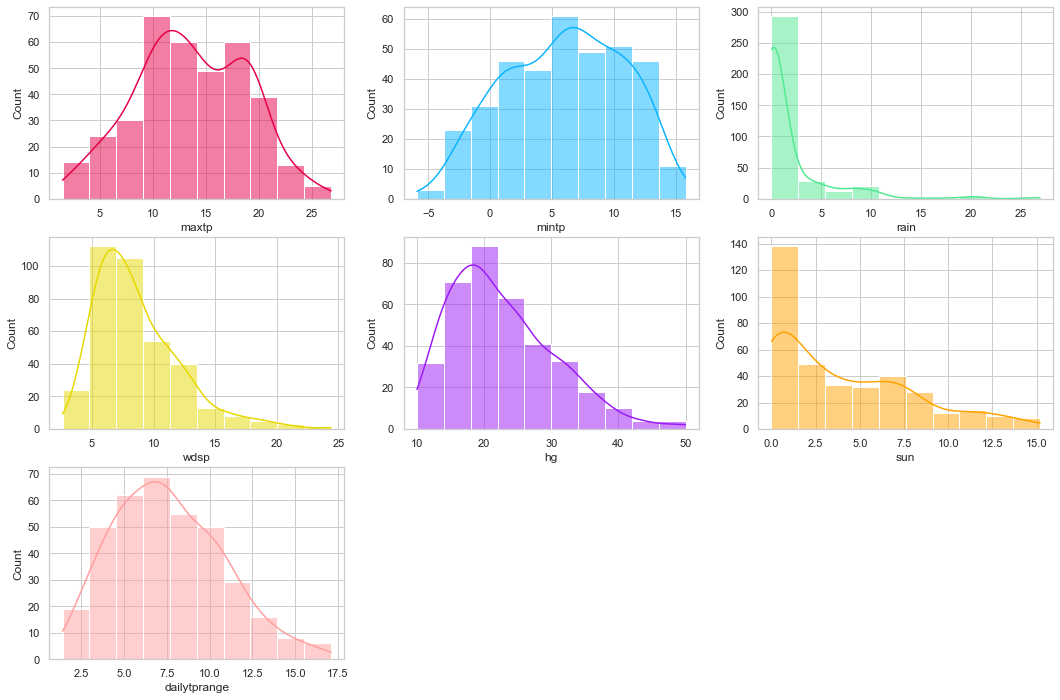

In [22]:
#Then, I show graphical summary for Dublin Airport
sns.set(style="whitegrid")

fig,axs = plt.subplots(3,3, figsize = (18,12))
sns.histplot(data=df_dublin_weathermeasurement, 
             x="maxtp", 
             kde=True, 
             color="#e60049", 
             ax=axs[0, 0], 
             bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="mintp", 
             kde=True, 
             color="#0bb4ff", 
             ax=axs[0, 1], bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="rain", kde=True, 
             color="#50e991", 
             ax=axs[0, 2], 
             bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="wdsp", kde=True, 
             color="#e6d800", 
             ax=axs[1, 0], 
             bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="hg", 
             kde=True, 
             color="#9b19f5", 
             ax=axs[1, 1], 
             bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="sun", 
             kde=True, 
             color="#ffa300", 
             ax=axs[1, 2], 
             bins =10)
sns.histplot(data=df_dublin_weathermeasurement, 
             x="dailytprange", 
             kde=True, 
             color="#ff9f9f",
             ax=axs[2, 0], 
             bins =10)

#Delete the last 2 columns
fig.delaxes(ax=axs[2,1])
fig.delaxes(ax=axs[2,2])

plt.show()

In [23]:
#Shannon Airport Weather Measurement
#I create weather measurement data frame for Shannon Airport and show the numerical summary
df_shannon_weathermeasurement = pd.DataFrame().assign(maxtp=df_shannon['maxtp'], 
                                                      mintp=df_shannon['mintp'], 
                                                      rain=df_shannon['rain'],
                                                      wdsp=df_shannon['wdsp'],
                                                      hg=df_shannon['hg'],
                                                      sun=df_shannon['sun'],
                                                      dailytprange=df_shannon['dailytprange'])
print(df_shannon_weathermeasurement.describe())

            maxtp       mintp        rain        wdsp          hg         sun  \
count  364.000000  364.000000  365.000000  365.000000  363.000000  364.000000   
mean    14.368681    7.611813    2.549041    7.815342   21.796143    3.856044   
std      5.175728    4.820239    4.007511    3.575878    8.372032    3.817264   
min      0.600000   -4.600000    0.000000    1.900000    8.000000    0.000000   
25%     11.100000    4.275000    0.000000    5.400000   16.000000    0.400000   
50%     14.100000    7.650000    0.500000    6.900000   20.000000    2.700000   
75%     18.000000   11.525000    3.400000    9.700000   26.000000    6.200000   
max     29.600000   18.700000   20.700000   25.800000   61.000000   15.000000   

       dailytprange  
count    364.000000  
mean       6.756868  
std        2.834320  
min        1.700000  
25%        4.800000  
50%        6.300000  
75%        8.425000  
max       15.000000  


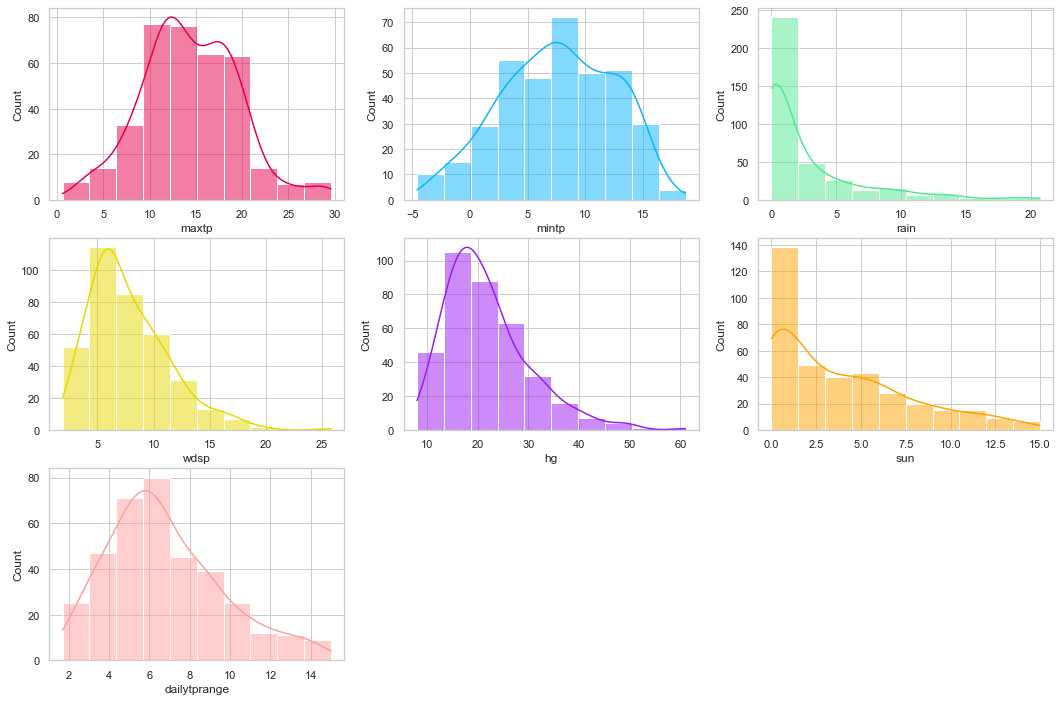

In [24]:
#Then, I show graphical Summary for Shannon Airport
sns.set(style="whitegrid")

fig,axs = plt.subplots(3,3, figsize = (18,12))
sns.histplot(data=df_shannon_weathermeasurement, 
             x="maxtp", 
             kde=True, 
             color="#e60049", 
             ax=axs[0, 0], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="mintp", 
             kde=True, 
             color="#0bb4ff", 
             ax=axs[0, 1], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="rain", 
             kde=True, 
             color="#50e991", 
             ax=axs[0, 2], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="wdsp", 
             kde=True, 
             color="#e6d800", 
             ax=axs[1, 0], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="hg", 
             kde=True, 
             color="#9b19f5", 
             ax=axs[1, 1], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="sun", 
             kde=True, 
             color="#ffa300", 
             ax=axs[1, 2], 
             bins =10)
sns.histplot(data=df_shannon_weathermeasurement, 
             x="dailytprange", 
             kde=True, 
             color="#ff9f9f",
             ax=axs[2, 0], 
             bins =10)

#Delete the last 2 columns
fig.delaxes(ax=axs[2,1])
fig.delaxes(ax=axs[2,2])

plt.show()

In [25]:
#Cork Airport Weather Measurement
#I create weather measurement data frame for Cork Airport and show the numerical summary
df_cork_weathermeasurement = pd.DataFrame().assign(maxtp=df_cork['maxtp'], 
                                                   mintp=df_cork['mintp'], 
                                                   rain=df_cork['rain'],
                                                   wdsp=df_cork['wdsp'],
                                                   hg=df_cork['hg'],
                                                   sun=df_cork['sun'],
                                                   dailytprange=df_cork['dailytprange'])
print(df_cork_weathermeasurement.describe())

            maxtp       mintp        rain        wdsp          hg         sun  \
count  365.000000  365.000000  362.000000  364.000000  365.000000  365.000000   
mean    13.239726    7.236438    3.415470    9.321978   24.164384    4.164110   
std      4.826949    4.339971    6.234737    3.924194    8.843284    4.077572   
min      1.900000   -2.700000    0.000000    2.400000    7.000000    0.000000   
25%      9.900000    3.800000    0.000000    6.600000   18.000000    0.200000   
50%     12.800000    6.900000    0.600000    8.500000   23.000000    3.100000   
75%     16.800000   11.100000    4.300000   11.200000   29.000000    7.000000   
max     25.700000   17.400000   50.100000   26.300000   64.000000   15.200000   

       dailytprange  
count    365.000000  
mean       6.003288  
std        2.342826  
min        1.000000  
25%        4.300000  
50%        6.200000  
75%        7.800000  
max       11.300000  


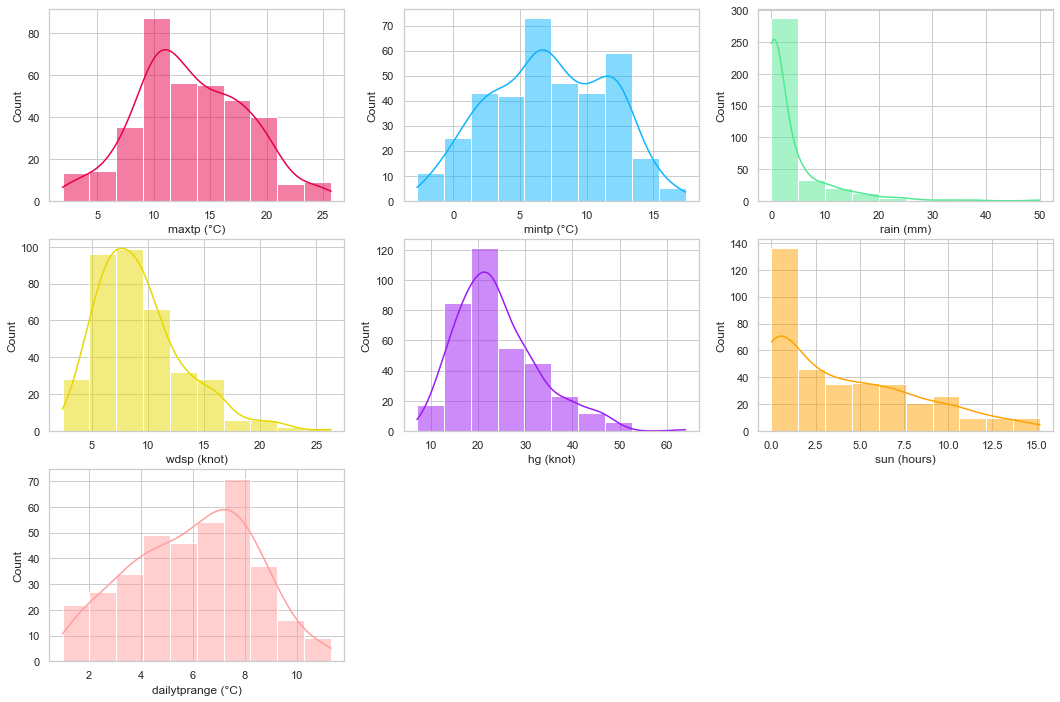

In [26]:
#Then, I create graphical summary for Cork Airport
sns.set(style="whitegrid")

fig,axs = plt.subplots(3,3, figsize = (18,12))
sns.histplot(data=df_cork_weathermeasurement, 
             x="maxtp", 
             kde=True, 
             color="#e60049", 
             ax=axs[0, 0], 
             bins =10).set(xlabel ="maxtp (°C)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="mintp", 
             kde=True, 
             color="#0bb4ff", 
             ax=axs[0, 1], 
             bins =10).set(xlabel ="mintp (°C)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="rain", 
             kde=True, 
             color="#50e991", 
             ax=axs[0, 2], 
             bins =10).set(xlabel ="rain (mm)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="wdsp", 
             kde=True, 
             color="#e6d800", 
             ax=axs[1, 0], 
             bins =10).set(xlabel ="wdsp (knot)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="hg", 
             kde=True, 
             color="#9b19f5", 
             ax=axs[1, 1], 
             bins =10).set(xlabel ="hg (knot)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="sun", 
             kde=True, 
             color="#ffa300", 
             ax=axs[1, 2], 
             bins =10).set(xlabel ="sun (hours)")
sns.histplot(data=df_cork_weathermeasurement, 
             x="dailytprange", 
             kde=True, 
             color="#ff9f9f",
             ax=axs[2, 0], 
             bins =10).set(xlabel ="dailytprange (°C)")

#Delete the last 2 columns
fig.delaxes(ax=axs[2,1])
fig.delaxes(ax=axs[2,2])

plt.show()

After I show the numerical and graphical summary in above section, I would like to compare each of the weather measurement based on the weather stations:

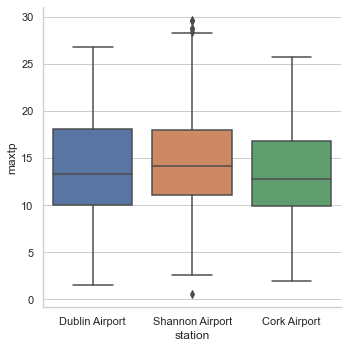

In [27]:
#Comparison boxplot for Maximum Air Temperature in 3 different stations
sns.catplot(x="station", 
            y="maxtp", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Maximum Air Temperature (maxtp) in three different stations:**

- On average, Shannon Airport has the highest Maximum Air Temperature. Both its mean (14.37°C) and its median (14.10°C) are higher compared to Dublin Aiport's mean of maxtp (13.59°C) and median of maxtp (13.30°C) and Cork Airport's mean of maxtp (13.24°C) and median of maxtp (12.80°C). 
- The interquartile range of Maximum Air Temperature for Dublin Airport is around 8.10°C and the interquartile range for Shannon and Cork Airports are around 6.90°C for both. Thus, the Maximum Air Temperature in Dublin Airport is more spread out by looking on the middle of the distributions compared to Shannon and Cork Airports. 
- It is also shown by the standard deviation of Maximum Air Temperature in Dublin Airport (5.26°C) compared to Shannon Airport (5.18°C) and Cork Airport (4.83°C), indicating that the Maximum Air Temperature in Dublin Airport is more spread out than the other two airports.
- The Maximum Air Temperature for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 1.50°C to 26.80°C (range values = 25.30°C), 0.60°C to 29.60°C (range values = 29.00°C), and 1.90°C to 25.70°C (range values = 23.80°C) respectively. Thus, Shannon Airport has greatest range of Maximum Air Temperature compared to Dublin and Cork Airports due to several outliers above the maximum and below the minimum value in Shannon Airport's distribution.
- There are no outliers for Maximum Air Temperature in Dublin and Cork Airports.
- All the distributions for Maximum Air Temperature in each of the station are rightly skewed with their mean greater than their median.

From above analysis, we can say that the Maximum Air Temperature in Dublin, Shannon, and Cork Airport do not really differ between each other.

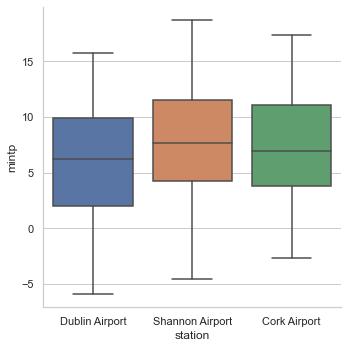

In [28]:
#Comparison boxplot for Minimum Air Temperature in 3 different stations
sns.catplot(x="station", 
            y="mintp", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Minimum Air Temperature (mintp) in three different stations:**

- On average, Dublin Airport has the lowest Minimum Air Temperature. Both its mean (6.00°C) and median (6.20°C) are lower compared to Cork Airport's mean of mintp (7.24°C) and median of mintp (6.90°C) and Shannon Airport's mean of mintp (7.61°C) and median of mintp (7.65°C).
- The interquartile range of Minimum Air Temperature for Dublin Airport, Shannon Airport, and Cork Airport are around 7.90°C, 7.25°C, and 7.30°C respectively. Thus, the Minimum Air Temperature in Dublin Airport is more spread out by looking on the middle of the distributions compared to Shannon and Cork Airports.
- By looking at the standard deviation of Minimum Air Temperature in Dublin Airport (4.75°C), Shannon Airport (4.82°C) and Cork Airport (4.34°C), the Minimum Air Temperature in Shannon Airport is more spread out than the other two airports. 
- The Minimum Air Temperature for Dublin Airport, Shannon Airport, and Cork Airport are ranging between -5.90°C to 15.80°C (range values = 21.70°C), -4.60°C to 18.70°C (range values = 23.30°C), and -2.70°C to 17.40°C (range values = 20.10°C) respectively. Thus, Shannon Airport has greatest range of Minimum Air Temperature, indicating the distributions of Minimum Air Temperature in Shannon Airport is more spread out compared to Dublin and Cork Airports.
- There are no outlier in these distributions.
- Minimum Air Temperature distributions in Dublin and Shannon Airports are leftly skewed, while the distribution in Cork Airport is rightly skewed.

From above analysis, we can say that the Minimum Air Temperature in Dublin, Shannon, and Cork Airport do not really differ between each other.

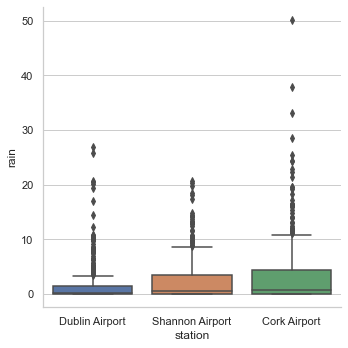

In [29]:
#Comparison boxplot for Precipitation Amount in 3 different stations
sns.catplot(x="station", 
            y="rain", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Precipitation Amount (rain) in three different stations:**

- On average, Cork Airport has the highest Precipitation Amount. Both its mean (3.42 mm) and median (0.60 mm) are higher compare to Shannon Airport's mean of rain (2.55 mm) and median of rain (0.50 mm) and Dublin Airport's mean of rain (1.83 mm) and median of rain (0.10 mm). 
- The interquartile range of Precipitation Amount for Dublin Airport, Shannon Airport, and Cork Airport are around 1.33 mm, 3.40 mm, and 4.30 mm respectively. Thus, the Precipitation Amount in Cork Airport is more spread out by looking on the middle of the distributions compared to Dublin and Shannon Airports.
- It is also shown by the standard deviation of Precipitation in Cork Airport (6.23 mm) compared to Shannon Airport (4.00 mm) and Dublin Airport (3.88 mm), indicating that the Precipitation Amount in Cork Airport is more spread out than the other two airports.
- The Precipitation Amount for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 0 mm to 26.90 mm (range value = 26.90 mm), 0 mm to 20.70mm (range value = 20.70 mm), and 0 mm to 50.10 (range value = 50.10 mm) respectively. Thus, Cork Airport's distribution of Precipitation Amount is more spread out compared to the other two airports due to the outliers.
- There are many outliers located above the maximum value of the distributions in each of the station.
- All the distributions for Precipitation Amount in each of the station are rightly skewed with their mean greater than their median.

From above analysis, we can say that the Precipitation Amount in Dublin, Shannon, and Cork Airport do not really differ between each other. However, there are many abnormal observations (outliers) above the maximum value within these variable that make the data become spread out.

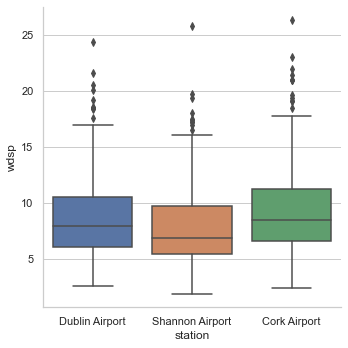

In [30]:
#Comparison boxplot for Mean Wind Speed in 3 different stations
sns.catplot(x="station", 
            y="wdsp", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Mean Wind Speed (wdsp) in three different stations:**

- On average, Cork Airport has the greatest Mean Wind Speed. Both its mean (9.32 knot) and median (8.50 knot) are greater compare to Dublin Airport's mean of wdsp (8.63 knot) and median of wdsp (7.90 knot) and Shannon Airport's mean of wdsp (7.82 knot) and median of wdsp (6.90 knot). 
- The interquartile range of Mean Wind Speed for Dublin Airport, Shannon Airport, and Cork Airport are is 4.40 knot, 4.30 knot, and 4.60 knot respectively. Thus, the Mean Wind Speed in Cork Airport are more spread out by looking on the middle of the distributions compared to Dublin and Shannon Airports.
- It is also shown by the standard deviation of Mean Wind Speed in Cork Airport (3.92 knot) compared to Shannon Airport (3.58 knot) and Dublin Airport (3.46 knot), indicating that the Mean Wind Speed in Cork Airport is more spread out than the other two airports.
- The Mean Wind Speed for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 2.60 knot to 24.40 knot (range value = 21.80 knot), 1.90 knot to 25.80 knot (range value = 23.90 knot), and 2.40 knot to 26.30 knot (range value = 23.90 knot) respectively. Thus, Cork Airport's and Shannon Airport's distributions of Mean Wind Speed are more spread out compared to Dublin Airport.
- There are many outliers located above the maximum value of the distributions in each of the station.
- All the distributions for Mean Wind Speed in each of the station are rightly skewed with their mean greater than their median.

From above analysis, we can say that the Mean Wind Speed in Dublin, Shannon, and Cork Airport do not really differ between each other. However, there are many abnormal observations (outliers) above the maximum value within these variable that make the data become spread out.

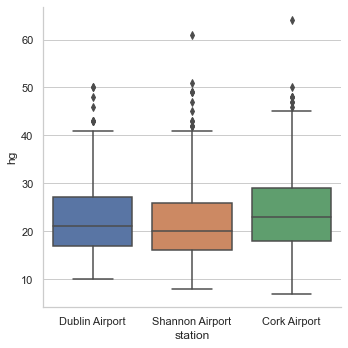

In [31]:
#Comparison boxplot for Highest Gust in 3 different stations
sns.catplot(x="station", 
            y="hg", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Highest Gust (hg) in three different stations:**

- On average, Cork Airport has the Highest Gust. Both its mean (24.16 knot) and median (23.00 knot) are higher compare to Dublin Airport's mean of hg (22.62 knot) and median of hg (21.00 knot) and Shannon Airport's mean of hg (21.80 knot) and median of hg (20.00 knot). 
- The interquartile range of Highest Gust for Dublin Airport, Shannon Airport, and Cork Airport are is 10.25 knot, 10.00 knot, and 11.00 knot respectively. Thus, the Highest Gust in Cork Airport are more spread out by looking on the middle of the distributions compared to Dublin and Shannon Airports.
- It is also shown by the standard deviation of Highest Gust in Cork Airport (8.84 knot) compared to Shannon Airport (8.37 knot) and Dublin Airport (7.79 knot), indicating that the Highest Gust in Cork Airport is more spread out than the other two airports.
- The Highest Gust for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 10.00 knot to 50.00 knot (range value = 40.00 knot), 8.00 knot - 61.00 knot (range value = 53.00 knot), and 7.00 knot to 64.00 knot (range value = 57.00 knot) respectively. Thus, Cork Airport's distribution of Highest Gust is more spread out compared to the other two airports.
- There are many outliers located above the maximum value of the distributions in each of the station.
- All the distributions for Highest Gust in each of the station are rightly skewed with their mean greater than their median.

From above analysis, we can say that the Highest Gust in Dublin, Shannon, and Cork Airport do not really differ between each other. However, there are many abnormal observations (outliers) above the maximum value within these variable that make the data become spread out.

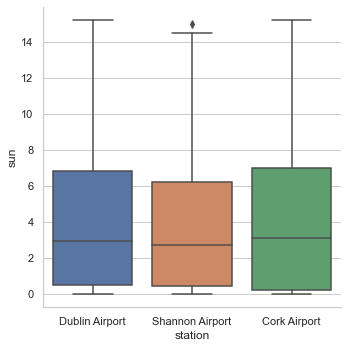

In [32]:
#Comparison boxplot for Sunshine Duration in 3 different stations
sns.catplot(x="station", 
            y="sun", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Sunshine Duration in three different stations:**

- On average, Cork Airport has the longest sunshine duration. Both its mean (4.16 hours) and median (3.10 hours) are greater compare to Dublin Airport's mean of sunshine duration (4.09 hours) and median of sunshine duration (2.90 hours) and Shannon Airport's mean of sunshine duration (3.86 hours) and median of sunshine duration (2.70 hours). 
- The interquartile range of Sunshine Duration for Dublin Airport, Shannon Airport, and Cork Airport are 6.30 hours, 5.80 hours, and 6.80 hours respectively. Thus, the Sunshine Duration in Cork Airport is more spread out by looking on the middle of the distributions compared to Dublin and Shannon Airports.
- It is also shown by the standard deviation of Sunshine Duration in Cork Airport (4.08 hours) compared to Dublin Airport (3.98 hours) and Shannon Airport (3.82 hours), indicating that the Sunshine Duration in Cork Airport is more spread out than the other two airports.
- The Sunshine Duration for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 0 hours to 15.20 hours (range value = 15.20 hours), 0 hours to15.00 hours (range value = 15.00 hours), 0 hours - 15.20 hours (range value = 15.20 hours) respectively. Thus, Cork Airport's and Dublin Airport's distributions of Sunshine Duration are more spread out compared to the other Shannon Airport. However, they are still quite similar to each other.
- There are few outliers located above the maximum value of the Shannon Airport's distribution and no outlier found in Dublin and Cork Airports' distributions.
- All the distributions for Sunshine Duration in each of the station are rightly skewed with their mean greater than their median.


From above analysis, we can say that the Sunshine Duration in Dublin, Shannon, and Cork Airport do not really differ between each other. 

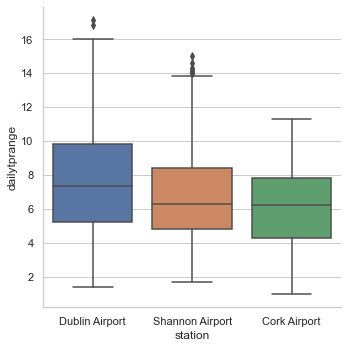

In [33]:
#Comparison boxplot for Daily Temperature Range in 3 different stations
sns.catplot(x="station", 
            y="dailytprange", 
            kind="box", 
            data=df)

plt.show()

**Comparison for the Daily Temperature Range (dailytprange) in three different stations:**

- On average, Dublin Airport has the greatest temperature range. Both its mean (7.59°C) and median (7.35°C) are greater compare to Shannon Airport's mean of daily temperature range (6.76°C) and median of daily temperature range (6.30°C) and Cork Airport's mean of daily temperature range (6.00°C) and median of daily temperature range (6.20°C). 
- The interquartile range of Daily Temperature Range for Dublin Airport, Shannon Airport, and Cork Airport are is 4.60°C, 3.63°C, and 3.50°C respectively. Thus, the Daily Temperature Range in Dublin Airport is more spread out by looking on the middle of the distributions compared to Shannon and Cork Airports.
- It is also shown by the standard deviation of Daily Temperature Range in Dublin Airport (3.20°C) compared to Shannon Airport (2.83°C) and Cork Airport (2.34°C), indicating that the Daily Temperature Range in Dublin Airport is more spread out than the other two airports.
- The range of Daily Temperature Range for Dublin Airport, Shannon Airport, and Cork Airport are ranging between 1.40°C to 17.10°C (range value = 15.70°C), 1.70°C to 15.00°C (range value = 13.30°C), and 1.00°C - 11.30°C (range value = 10.30°C) respectively. Thus, Dublin Airport's distribution of Daily Temperature Range is more spread out compared to the other two airports. 
- There are several outliers in the maximum value for Daily Temperature Range in Dublin and Shannon Airports' distributions and no outlier found in Cork Airport's distribution.
- The distributions for Daily Temperature Range in Dublin and Shannon Airports are rightly skewed with their mean greater than their median, where the distributions for Daily Temperature Range in Cork Airports is leftly skewed with its mean lesser than its median.

From above analysis, we can say that the Sunshine Duration in Dublin, Shannon, and Cork Airport do not really differ between each other. 

> **In conclusion from the comparative analysis above, the weather in Dublin, Shannon, and Cork Airports do not really differ between each other by looking at each of the weather measurement.**

I now would like to do comparative analysis on the correlation between each weather measurement variables. Thus, I create a correlation table and graph below:

In [34]:
#Below is the code and result for the correlation test:
df_for_correlation = pd.DataFrame().assign(station=df['station'],
                                           maxtp=df['maxtp'], 
                                           mintp=df['mintp'], 
                                           rain=df['rain'],
                                           wdsp=df['wdsp'],
                                           hg=df['hg'],
                                           sun=df['sun'],
                                           dailytprange=df['dailytprange'])

corr_matrix = df_for_correlation.corr()
print(corr_matrix)

                 maxtp     mintp      rain      wdsp        hg       sun  \
maxtp         1.000000  0.829861 -0.073020 -0.292425 -0.282954  0.328397   
mintp         0.829861  1.000000  0.082382 -0.107681 -0.143166 -0.054507   
rain         -0.073020  0.082382  1.000000  0.357157  0.410565 -0.276510   
wdsp         -0.292425 -0.107681  0.357157  1.000000  0.891844 -0.181588   
hg           -0.282954 -0.143166  0.410565  0.891844  1.000000 -0.162823   
sun           0.328397 -0.054507 -0.276510 -0.181588 -0.162823  1.000000   
dailytprange  0.422061 -0.155585 -0.263338 -0.342764 -0.268099  0.667679   

              dailytprange  
maxtp             0.422061  
mintp            -0.155585  
rain             -0.263338  
wdsp             -0.342764  
hg               -0.268099  
sun               0.667679  
dailytprange      1.000000  


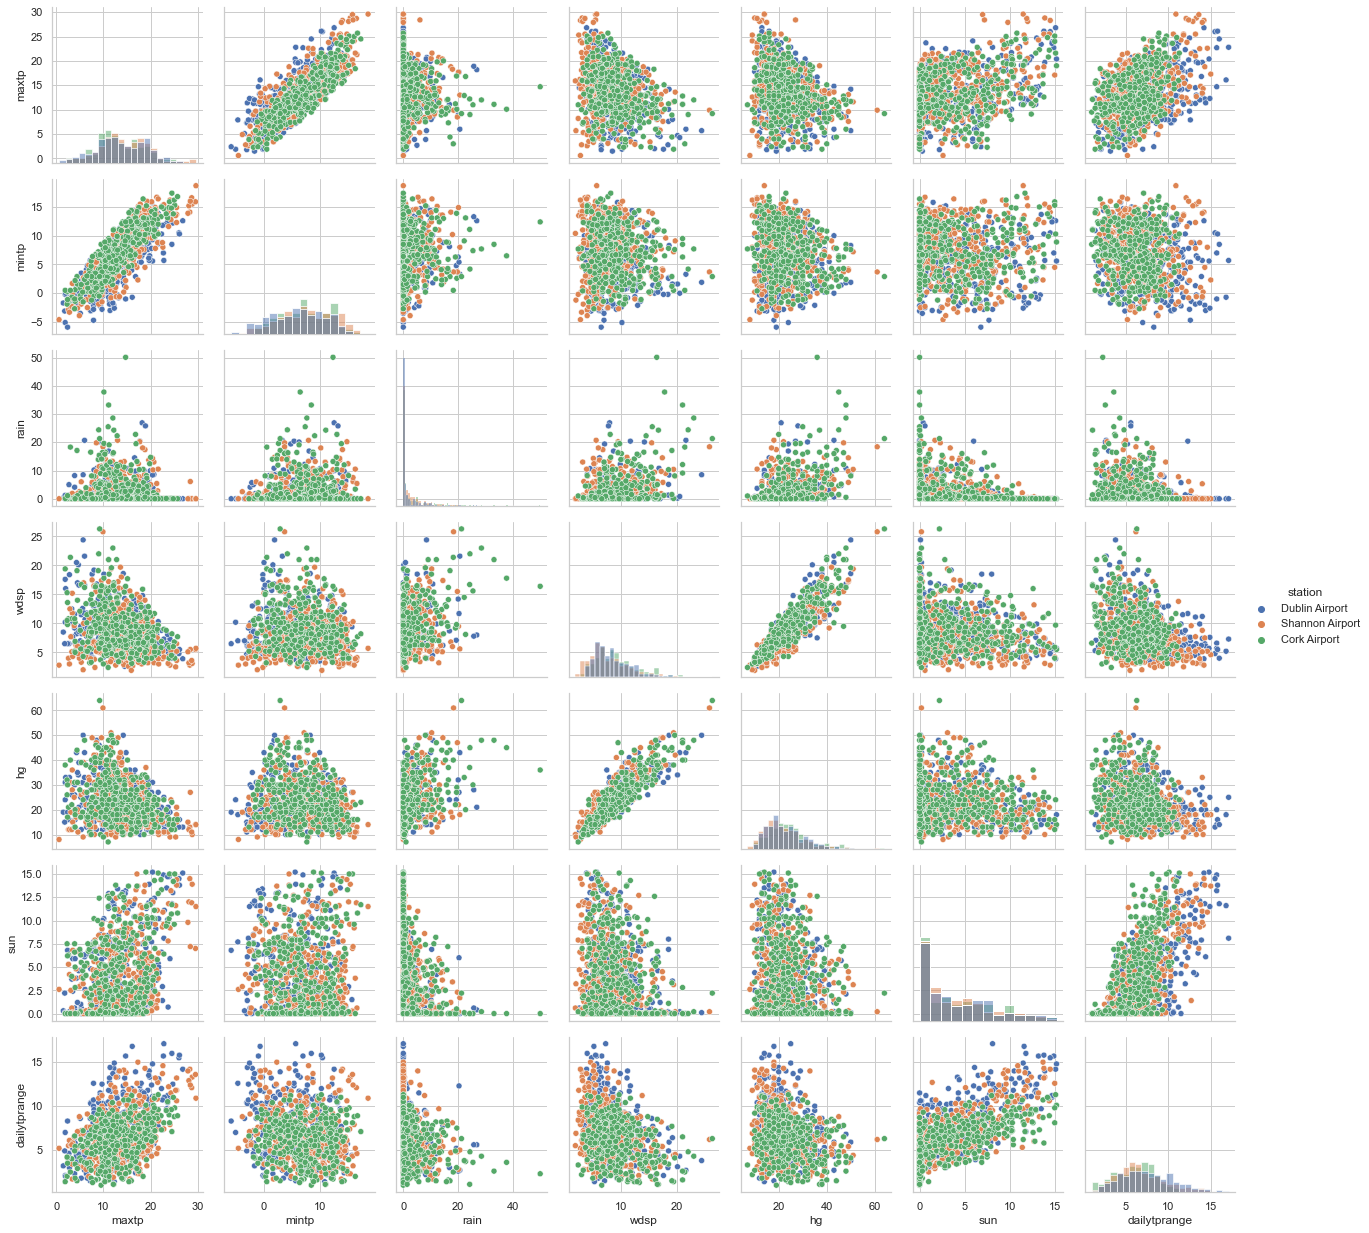

In [35]:
g = sns.PairGrid(df_for_correlation, hue="station")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()

> We can see in the correlation table and graph above that the relationship between Mean Wind Speed (wdsp) and Highest Gust (hg) have the highest correlation of 0.891844, indicating a positive strong relationship between each other. Followed by the relationship between Maximum Temperature Air (maxtp) and Minimum Temperature Air (mintp) with correlation of 0.829861, also indicating a positive strong relationship between each other. 

> Let us see the relationship plot between these weather measurements. I create 2 plot:
> 1. The First Plot shows the relationship between Mean Wind Speed and Highest Gust in each weather stations.
> 2. The Second Plot shows the relationship between Maximum Air Temperature and Minimum Air Temperature in each weather stations.

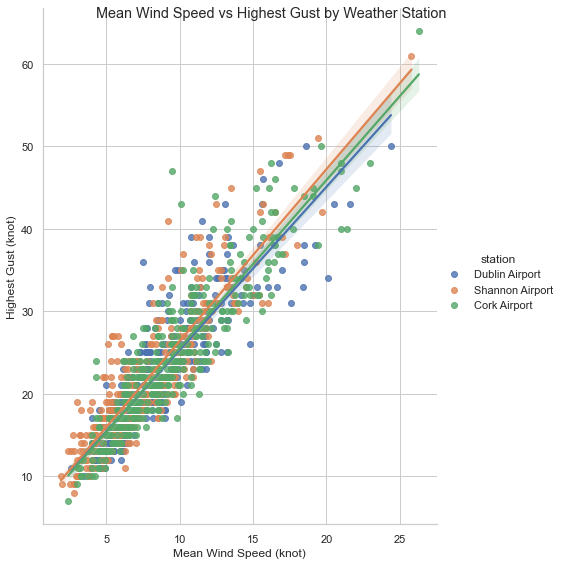

In [36]:
#First Plot
sns.lmplot(x='wdsp', 
           y='hg', 
           height=8,
           aspect=.8,
           data=df, 
           hue='station', 
           legend=True).fig.suptitle("Mean Wind Speed vs Highest Gust by Weather Station")


plt.xlabel("Mean Wind Speed (knot)")
plt.ylabel("Highest Gust (knot)")
 
plt.show()

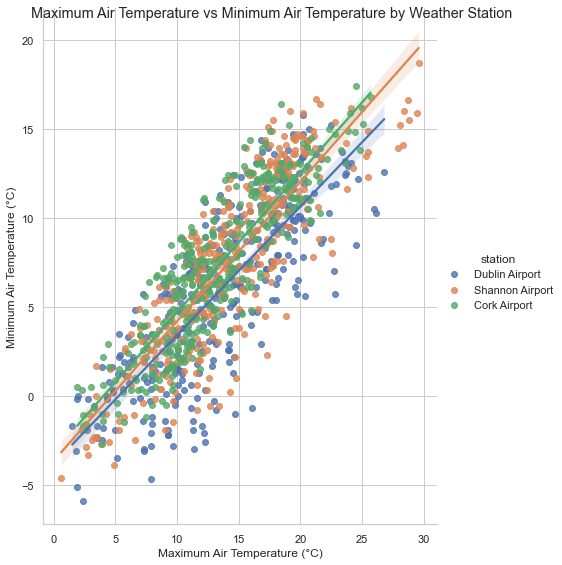

In [37]:
#Second plot
sns.lmplot(x='maxtp', 
           y='mintp', 
           height=8,
           aspect=.8,
           data=df, 
           hue='station', 
           legend=True).fig.suptitle("Maximum Air Temperature vs Minimum Air Temperature by Weather Station")


plt.xlabel("Maximum Air Temperature (°C)")
plt.ylabel("Minimum Air Temperature (°C)")
 
plt.show()

> We can see from two relationship plots above that the relationship between Mean Wind Speed versus Highest Gust, and Maximum Air Temperature vs Minimum Air Temperature are indeed having a strong positive relationship between each other.

# References

A Complete Guide to Dealing with Missing values in Python. (2021, October 30). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/a-complete-guide-to-dealing-with-missing-values-in-python/

Soni, A. (2020, July 3). Advantages And Disadvantages of KNN. Medium. https://medium.com/@anuuz.soni/advantages-and-disadvantages-of-knn-ee06599b9336

Kline, A. (2022, May 15). Implementation and Limitations of Imputation Methods. Medium. https://towardsdatascience.com/implementation-and-limitations-of-imputation-methods-b6576bf31a6c